In [ ]:
! git clone https://github.com/Mayukhdeb/ml4a.git
import os 
os.chdir("ml4a")

In [ ]:
## bunch of commands for a temp install
!git checkout ml4a.net
!git submodule update --init --recursive
!python setup.py install

In [ ]:
!pip install noise --force

In [11]:
from ml4a.models.torch_dreams import dreamer
import matplotlib.pyplot as plt
import torchvision.models as models
import cv2
import numpy as np

In [ ]:
model = models.inception_v3(pretrained=True)
dreamy_boi = dreamer(model)

In [40]:
from ml4a import mask
from ml4a import image
from ml4a.models import basnet

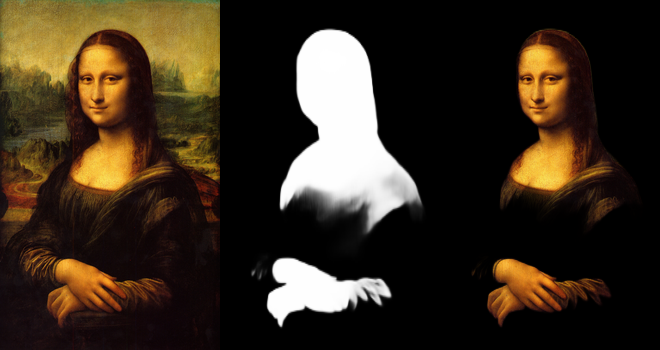

In [41]:
img = image.load_image('https://upload.wikimedia.org/wikipedia/commons/6/6a/Mona_Lisa.jpg', (220, 350))
img_fg = basnet.get_foreground(img)
img_masked = mask.mask_image(img, img_fg)

all_images = image.concatenate_images([img, img_fg, img_masked])
image.display(all_images)

In [17]:
cv2.imwrite("mona.jpg", cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB))

True

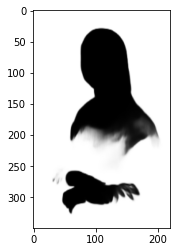

In [18]:
mask = 1-img_fg/255.0
plt.imshow(mask)

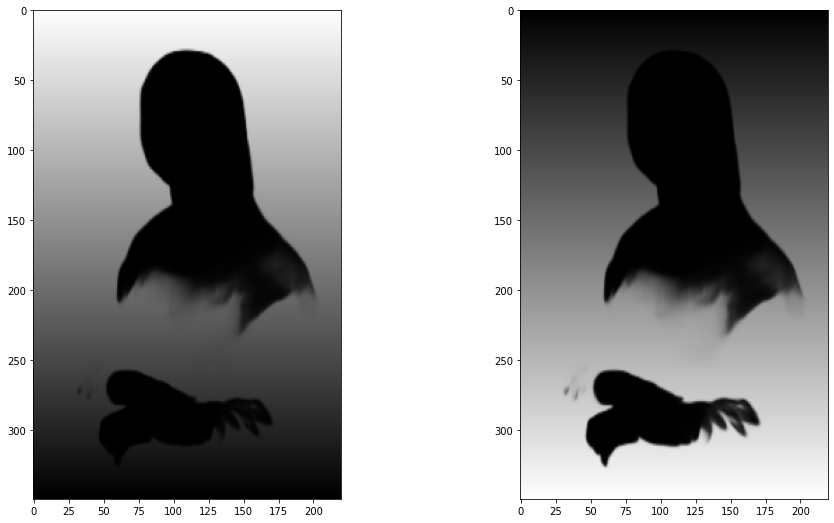

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,9))
g_overlay =  np.repeat(np.linspace(1, 0, 350),220*3).reshape(350,220,3).astype(np.float32)

m1 = mask*g_overlay
m2 = mask*(1-g_overlay)
ax.flat[0].imshow(m1)
ax.flat[1].imshow(m2)

In [37]:

layers_to_use = [model.Mixed_6c.branch7x7_1.conv]

def make_custom_func(layer_number = 0, channel_number= 0): 
    def custom_func(layer_outputs):
        if channel_number is not None:

            loss = layer_outputs[layer_number][channel_number].mean()
        else:
            loss = layer_outputs[layer_number].mean()

        return loss
    return custom_func

c1 = make_custom_func(0, 115)

config = {
    "image_path": "mona.jpg",
    "layers": layers_to_use,
    "octave_scale": 1.1,
    "num_octaves": 10,
    "iterations": 80,
    "lr": 0.09,
    "max_rotation": 0.7,
    "grad_mask": [m2],
    "custom_func": [c1]
}




  0%|          | 0/11 [00:00<?, ?it/s]

  9%|▉         | 1/11 [00:02<00:24,  2.47s/it]

 18%|█▊        | 2/11 [00:04<00:21,  2.43s/it]

 27%|██▋       | 3/11 [00:07<00:19,  2.44s/it]

 36%|███▋      | 4/11 [00:09<00:17,  2.44s/it]

 45%|████▌     | 5/11 [00:12<00:14,  2.45s/it]

 55%|█████▍    | 6/11 [00:15<00:12,  2.58s/it]

 64%|██████▎   | 7/11 [00:17<00:10,  2.68s/it]

 73%|███████▎  | 8/11 [00:20<00:08,  2.76s/it]

 82%|████████▏ | 9/11 [00:23<00:05,  2.84s/it]

 91%|█████████ | 10/11 [00:26<00:02,  2.74s/it]

100%|██████████| 11/11 [00:29<00:00,  2.64s/it]


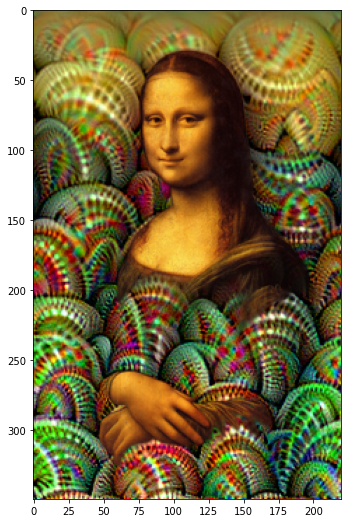

In [38]:
plt.rcParams['figure.figsize'] = 9, 9
out = dreamy_boi.deep_dream_with_masks(config)
res = out*mask + np.array(img)*(1-mask)/255  ## replace non masked part with original 
plt.imshow(res)
plt.show()